###  Theoretical question

In [2]:
from time import perf_counter
import matplotlib.pyplot as plt

## BUBBLE-SORT

The Bubble Sort algorithm is one of the simplest sorting algorithm. It basically works by swapping one element with his adiacent one if they are not in a correct  order.
<br>This sorting algorithm is not really good for large data beacuse its time-complexitity is pretty high.
<br>It means that if you have 1000 items, this does 100^2 = 1,000,000 units of work.


##### How this algorithm work

Let's assume this input : array=[4,6,8,4,6,7]

First Step
<br>(4,6,8,4,6,7) -----> (6,4,8,4,6,7) swap 4 and 6 since 6>4
<br>(6,4,8,4,6,7) -----> (6,8,4,4,6,7) swap 8 and 4 since 8>4
<br>(6,8,4,4,6,7) -----> (6,8,4,4,6,7) no swap 4 = 4
<br>(6,8,4,4,6,7) -----> (6,8,4,6,4,7) swap 6 and 4 since 6>4
<br>(6,8,4,6,4,7) -----> (6,8,4,6,7,4) swap 7 and 4 since 7>4

Second step
<br>(6,8,4,6,7,4) -----> (8,6,4,6,7,4) swap 8 and 6 since 8>6
<br>(8,6,4,6,7,4) -----> (8,6,4,6,7,4) no swap since 4<6
<br>(8,6,4,6,7,4) -----> (8,6,6,4,7,4) swap 6 and 4 since 6>4
<br>(8,6,6,4,7,4) -----> (8,6,6,7,4,4) swap 7 and 4 since 7 > 4
<br>(8,6,6,7,4,4) -----> (8,6,6,7,4,4) no swap since 4=4

Third step
<br>(8,6,6,7,4,4) -----> (8,6,6,7,4,4) no swap since 6<8
<br>(8,6,6,7,4,4) -----> (8,6,6,7,4,4) no swap since 6=6
<br>(8,6,6,7,4,4) -----> (8,6,7,6,4,4) swap 7 and 6 since 7>6
<br>(8,6,7,6,4,4) -----> (8,6,7,6,4,4) no swap since 4<6
<br>(8,6,7,6,4,4) -----> (8,6,7,6,4,4) no swap since 4=4

Fourth step
<br>(8,6,7,6,4,4) -----> (8,6,7,6,4,4) no swap since 6<8
<br>(8,6,7,6,4,4) -----> (8,7,6,6,4,4) swap 7 and 6 since 7>6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 6=6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 4<6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 4 = 4

Although the array is already sorted, the algorithm needs a swap-free pass in order to be completed

Fifth Step
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 6<8
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 6<7
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 6=6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 4<6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 4=4

#### Now it's time to apply this algorithm to ApplicantsInfo.txt

In [3]:
#### Open ApplicantsInfo.txt
data=[]
with  open('ApplicantsInfo.txt','r') as f:
    #### read each lines and stored it into data 
    data=f.readlines()
    
def Bubble_Sort(N):
    start=perf_counter()## perf_counter() in order to compute the time that algorithm needs to execute the query stored into ApplicantsInfo.txt
    ######################
    
    # First of all I created a list where for each row in data, it is appended a nested list where in elemnent 0 it is stored the applicant's name and in element 1 position -->
    # --> it is stored the applicant's average
    out=[]
    for i in range(1,N+1):
        row=[]
        line=data[i].split(' ')
        name=str(line[0])+' ' +str(line[1])
        marks=0
        row.append(name)
        for j in range(2,1002):
            marks+=int(line[j])
            ### compute the average  dividing by 1000, the number of exams that each student has taken
            average=marks/1000
        ### setting the precision to 2 decimal points 
        row.append(round(average,2))
        out.append(row)
    n=len(out)
    
    ######################
    
    # here starts the actual algorithm
     
    for i in range(n):
        for j in range(0,n-i-1):

            if out[j][1]<out[j+1][1]:
                out[j],out[j+1]=out[j+1],out[j]
            elif out[j][1]==out[j+1][1]:
                if out[j][0]>out[j+1][0]:
                    out[j],out[j+1]=out[j+1],out[j]
    ### It swaps two nested list also if it finds two name not in ascending order 
    
    
    
    ### now I created a txt file where there all the names of the applicants and the average sorted by descending order 
    with open('RankingList_BubbleSort.txt','w') as f:
        for i in out:
            a=i[0]+' '+str(i[1])
            f.write(a)
            f.write('\n')
    
    end=perf_counter()
    final_time = end-start
    time=round(final_time,2)
    
    return time

#### Time complexity 

Assuming that **n** is the length of the array to sort and keeping in mind that Bubble Sort compares two adjacent element of the array:

| Iterations     | number of comparisons |
|----------------|-----------------------|
| 1              | n-1                   |
| 2              | n-2                   |
| 3              | n-3                   |
| ...            | ...                   |
| last iteration | 1                     |

<br>The total number of comparisons are:
<br> T(n)=(n-1)+(n-2)+(n-3)+...+1 = (n-1)n/2 ----> n^2
<br> The time complexity of this algorithm is O(n^2)



###### Evaluate the time taken for Bubble Sort to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [5]:
#### I stored the time that this algorithm need in order to sort five array with five different length
x=[1000,5000,10000,20000,50000]
y=[Bubble_Sort(1000),Bubble_Sort(5000),Bubble_Sort(10000),Bubble_Sort(20000),Bubble_Sort(50000)]

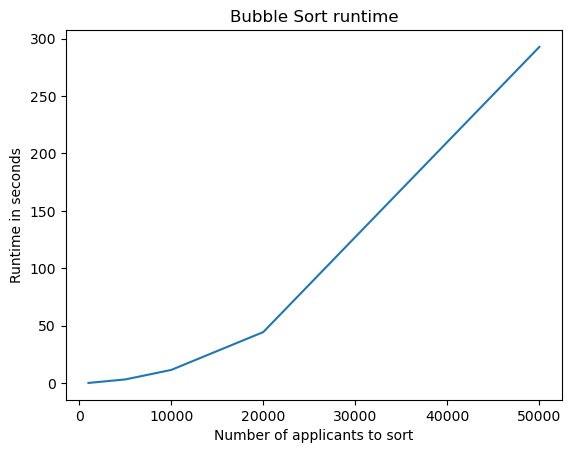

In [ ]:
### Plot runtime of Bubble Sort
plt.plot(x,y)
plt.xlabel('Number of applicants to sort')
plt.ylabel('Runtime in seconds')
plt.title('Bubble Sort runtime')
plt.show()

In [8]:
Bubble_Sort(50000) #### Time needed to execute the query stored into ApplicantsInfo.txt in seconds

290.92

##### SELECTION SORT

The Selection Sort algorithm is another simple sorting algorithm. It basically divided a list in two sub-lists, one(left) is sorted, the other one (right) not.
<br>Initially the left-list is empty and the right-list contains all the elements.
<br>Basically in each iteration the minimum / maximum element from the unsorted list is taken and moved to the sorted array.

Even this algorithm like bubble sort is not very suitable for large data beacause its time complexity is pretty high O(n^2).
It means that if you have 1000 items, this does 100^2 = 1,000,000 units of work.

##### How this algorithm work

Let's assume this input : array=[4,6,8,4,6,7]

First step
<br>(4,6,8,4,6,7)----->(8,6,4,4,6,7)
<br>The array is traversed from index 0 to 5. The first poistion where it is stored 4, after traversing the whole array 8 is the highest values.
<br>So the algorithm swaps 8 and 4, so the first element in the sorted array is 8

Second step
<br>(8,6,4,4,6,7)----->(8,7,4,4,6,6)
<br>The array is traversed from index 1 to 5. The second poistion where it is stored 6, after traversing the right array 7 is the highest values.
<br>So the algorithm swaps 7 and 6, so the second element in the sorted array is 7

Third step
<br>(8,7,4,4,6,6)----->(8,7,6,4,4,6)
<br>Now the array is traversed from index 2 to 5. The third poistion where it is stored 4, after traversing the right array 6 is the highest values.
<br>So the algorithm swaps 6 and 4, so the third element in the sorted array is 6

Fourth step
<br>(8,7,6,4,4,6)----->(8,7,6,6,4,4)
<br>At last the smallest value present in the array automatically get placed at the last position in the sorted array

#### Now it's time to apply this algorithm to ApplicantsInfo.txt

In [4]:
#### Open ApplicantsInfo.txt
data=[]
with  open('ApplicantsInfo.txt','r') as f:
    data=f.readlines()

def Selection_Sort(N):
    
    start=perf_counter() ## perf_counter() in order to compute the time that algorithm needs to execute the query stored into ApplicantsInfo.txt
    
    ######################
    
    # First of all I created a list where for each row in data, it is appended a nested list where in elemnent 0 it is stored the applicant's name and in element 1 position -->
    # --> it is stored the applicant's average

    out=[]
    for i in range(1,N+1):
        row=[]
        line=data[i].split(' ')
        name=str(line[0])+' ' +str(line[1])
        marks=0
        row.append(name)
        for j in range(2,1002):
            marks+=int(line[j])
            ### compute the average  dividing by 1000, the number of exams that each student has taken
            average=marks/1000
        ### setting the precision to 2 decimal points
        row.append(round(average,2))
        out.append(row)

    ######################
    
    # here starts the actual algorithm
    n=len(out)
    
    for i in range(n):
        min_=i # store the index of the array in order to swap with the maximum element of the unsorted array
        for j in range(i+1,n):
            if out[min_][1]<out[j][1]  :
                         min_=j
            elif out[min_][1]==out[j][1]:
                if out[min_][0]>out[j][0]:  ### It swaps two nested list also if it finds two name not in ascending order 
                    min_=j


        out[min_],out[i]=out[i],out[min_]
    
    
    
    ### now I created a txt file where there all the names of the applicants and the average sorted by descending order 
    with open('RankingList_SelectionSort.txt','w') as f:
        for i in out:
            a=i[0]+' '+str(i[1])
            f.write(a)
            f.write('\n')
    
    end=perf_counter()
    final_time=end-start
    time=round(final_time,2)
    
    return time


#### Time complexity 

Assuming that  **n** is the length of the array to sort, so:

| Iterations     | number of comparisons |
|----------------|-----------------------|
| 1              | n-1                   |
| 2              | n-2                   |
| 3              | n-3                   |
| ...            | ...                   |
| last iteration | 1                     |

The total number of comparisons are:
<br> T(n)=(n-1)+(n-2)+(n-3)+...+1 = (n-1)n/2 ----> n^2
<br> The time complexity of this algorithm is O(n^2)

##### Evaluate the time taken for Selection Sort to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [11]:
#### I stored the time that this algorithm need in order to sort five array with five different length
x=[1000,5000,10000,20000,50000]
y=[Selection_Sort(1000),Selection_Sort(5000),Selection_Sort(10000),Selection_Sort(20000),Selection_Sort(50000)]

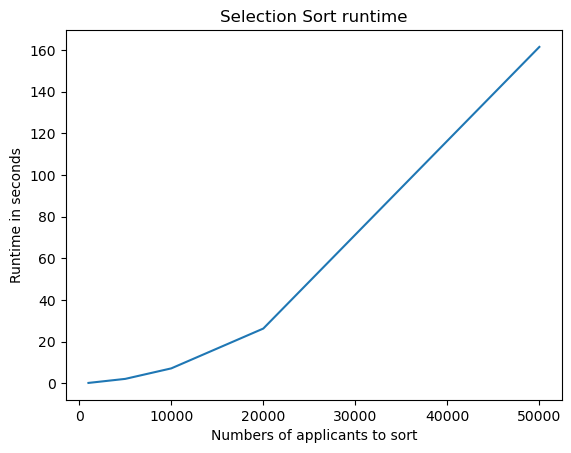

In [12]:
### Plot runtime of Selection Sort
plt.plot(x,y)
plt.xlabel('Numbers of applicants to sort')
plt.ylabel('Runtime in seconds')
plt.title('Selection Sort runtime')
plt.show()

In [13]:
Selection_Sort(50000)  #### Time needed to sort a list of 50,000 elements in seconds

156.96

##### QUICK-SORT

The QuickSort algorithm is a sorting algorithm based on the divide and conquer approach.It stored an element of an array as pivot and it builds partions around this pivot element.
<br>The type of the QuickSort depends on the method how the pivot element is picked from the array(in this case we always pick the last element as the pivot).
<br>The key process in quickSort is a partition(). The aim of partitions is, given an array and an element y as the pivot element, put y at its correct position in a sorted array and put all smaller elements <br>before y, and put all greater elements after y. All this step should be done in linear time.
<br>The average time complexity of this algorithm is O(Nlog(N)), it should be faster than the previous two


The average time complexity of this algorithm is O(Nlog(N)), it should be faster than the previous two

##### How this algorithm work

Let's assume this input : array=[4,6,8,4,6,7]

1. Pick pivot element 
(4,6,8,4,6,7)-----> pivot = 7

2. Rearrange the arrays in this way:
   2.1 The pivot element is compared with the elements beginning from the first index.
      <br>(4,6,8,4,6,7)-----> pivot(7) is compared with 4 
  
   2.2 If the element is smaller than the pivot element, a second pointer is set for that element.
      <br>    (4,6,8,4,6,7)-----> 4<7 so 4 is the second pointer
  
   2.3 Now, pivot is compared with other elements. If an element greater than the pivot element is reached, the greater element is swapped with the smaller element found earlier.
      <br>(4,6,8,4,6,7)-----> (8,6,4,4,6,7) 8>7(pivot) swap 8 and 4
  
   2.4 Again, the process is repeated to set the next smaller element as the second pointer. And, swap it with another greater element.
      <br>(8,6,4,4,6,7)-----> 6 is stored
   
   2.5 The process goes on until the second last element is reached.
      <br>(8,6,4,4,6,7)-----> it goes until 6(index=4)
   
   2.6 Finally, the pivot element is swapped with the second pointer.
      <br>(8,6,4,4,6,7)----->(8,7,4,4,6,6)
      
3. Divide Sub-arrays, choose the new pivot elements for the left-part of the array and for the right-part and the second step(2.) is repeated

This algorithm continues to divide in subarray until each array is formed by a single element, in this way the array is sorted

  

#### Now it's time to apply this algorithm to ApplicantsInfo.txt

In [1]:
#### Open ApplicantsInfo.txt
with  open('ApplicantsInfo.txt','r') as f:
    data=f.readlines()

def Partition(out, min_, max_): ### first of all I defined a function in order to build partitions of the array
  
    # Choose the rightmost element as pivot, in this case the pivot element it is also the name of the student
    pivot = out[max_][1]
    pivot_name=out[max_][0]
  
    # Pointer for greater element
    i = min_ - 1
  
    # Traverse through all elements and compare each element with pivot
    for j in range(min_, max_):
        if out[j][1] > pivot:
            # If element greater than pivot is found
            # swap it with the smaller element  i
            i = i + 1
  
            # Swapping element at i with element at j
            (out[i], out[j]) = (out[j], out[i])
        elif out[j][1]==pivot: ## if two applocants have the same average
            
            if out[j][0]<pivot_name:
                # If element smaller than pivot is found
                # swap it with the greater element  i
                i=i+1
               
                (out[i], out[j]) = (out[j], out[i])
                
            
  
    # Swap the pivot element with the smaller element specified by i
    (out[i + 1][1], out[max_][1]) = (out[max_][1], out[i + 1][1])
    (out[i + 1][0], out[max_][0]) = (out[max_][0], out[i + 1][0])
   
    
  
    # Return the position of the partion
    return i + 1
  
# Function to initialize the list where for each row in data, it is appended a nested list where in elemnent 0 it is stored the applicant's name and in element 1 position -->
    # --> it is stored the applicant's average
def init(N):
    out=[]
    for i in range(1,N+1):
            row=[]
            line=data[i].split(' ')
            name=str(line[0])+' ' +str(line[1])
            marks=0
            row.append(name)
            for j in range(2,1002):
                marks+=int(line[j])
                ### compute the average  dividing by 1000, the number of exams that each student has taken
                average=marks/1000
            ### setting the precision to 2 decimal points
            row.append(round(average,2))
            out.append(row)
    return out

# Function to compute quicksort with recursive  
def Quick_Sort(out, min_, max_):
    
    start=perf_counter() ## perf_counter() in order to compute the time that algorithm needs to sort the list
    if min_ < max_:
        
        # Find pivot element such that
        # element greater than pivot are on the left 
        # element smaller than pivot are on the right 
        p = Partition(out, min_, max_)
       
  
        # Recursive call on the left side of pivot
        Quick_Sort(out, min_, p - 1)
  
        # Recursive call on the right side of pivot
        Quick_Sort(out, p + 1, max_)
    end=perf_counter()
    final_time=end-start
    time=round(final_time,2)
    
    return out ### change with (return out) to create the get the list ordered as the output 

# function to create a txt file where there all the names of the applicants and the average sorted by descending order 
def Quick_Sort_Executequery(N):
    start=perf_counter() ## start a counter in order to calcute how does it takes to execute the query 
    
    a=Quick_Sort(init(N),0,len(init(N))-1)
    with open('RankingList_QuickSort.txt','w') as f:
        for i in a:
            a=i[0]+' '+str(i[1])
            f.write(a)
            f.write('\n')
    
    end=perf_counter() ## end the counter
    final_time=end-start
    time=round(final_time,2)
    return time

#### Time complexity 

The time complexity of this algorithm depends on the pivot's position into the array:
* *Worst case*
  <br> This situation occurs when the partition function selects the smallest or the largest element of the array as the pivot every time. 
  <br> In this case the time complexity of quicksort is O(n^2)
  <br> Lets T(n) ne total time complexity for worst case
  <br> n is the total number of elements to sort and K is a constant

  >     T(n) = T(n-1) + K*n
        as we are dividing array into two parts one consist of single element and other of n-1 and we will traverse individual array
        T(n) = T(n-2) + K*(n-1) + K*n =  T(n-2) + 2*K*n - K
        T(n) = T(n-3) + 3*K*n - 2*K - K
        T(n) = T(n-3) + 4*K*n - 3*K - 2*K -K
        ....................................................................
        for j<n 
        T(n) = T(n-j) + j*K*n - (j-1)*K - ..... - 2*constant - constant
        T(n) = T(n-j) + j*K*n - k*[(j-1) ....  + 3 + 2 + 1]
        T(n) = T(n-j) + j*n*K - K*[j*(j-1)/2]
        put n=j
        T(n) = T(0) + K*n*n - K*[n*(n-1)/2]
        deleting K
        T(n) = n*n - n*(n-1)/2
        T(n) = O(n^2)
        
* *Best case*
  <br> This situation occurs when the pivot elemnt is selected from the middle of the partion:
  <br> In this case the time complexity of quick sort is O(nlog(n))
  <br> Lets T(n) the total time complexity for best case
  <br> n is the total number of elements to sort and K is a constant
  >    T(n) = 2*T(n/2) + K*n
        2*T(n/2) is because we are dividing array into two array of the same size
        <br>K*n is because we will be traversing elements of array 
        
  >      T(n) = 2*T(n/2) + K*n
        Dividing the array in two of the same size (like a binary tree)
        T(n) = 2*(2*T(n/4) + K*n/2) + K*n = 4*T(n/4) + 2*K*n
        T(n) = 2*(4*T(n/8)+ K*n/4)  + K*n = 8*T(n/8) + 4*K*n
        T(n) = 2*(8*T(n/16)+ K*n/8)  + K*n = 16*T(n/16) + 8*K*n
        ....................................................... 
        for j<n
        T(n) = 2^j * T(n/(2^j)) + j*K*n
        n = 2^j
        j = log2(n)
        Removing the costant 
        T(n) = n * T(1) + n*logn = O(n*log2(n))
  
* *Average case*
  <br> This situation occurs when the previous situations don't occur.
  <br> Considering a random element as pivot, Lets T(n) the total time complexity for average case  and i the pivot picked randomly.
  <br>then time complexity will be O(n*log(n))
   
  
                


##### Evaluate the time taken for Selection Sort to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [13]:
#### I stored the time that this algorithm need in order to sort five array with five different length
x=[1000,5000,10000,20000,50000]
y=[Quick_Sort_Executequery(1000),
  Quick_Sort_Executequery(5000),
  Quick_Sort_Executequery(10000),
  Quick_Sort_Executequery(20000),
  Quick_Sort_Executequery(50000)]
    


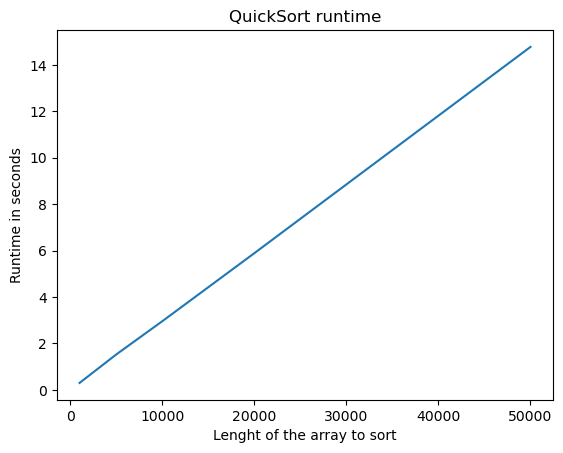

In [14]:
## Plot runtime of Quick Sort
plt.plot(x,y)
plt.xlabel('Lenght of the array to sort')
plt.ylabel('Runtime in seconds')
plt.title('QuickSort runtime')

plt.show()

In [22]:
Quick_Sort_Executequery(50000) ##### Time needed to sort a list of 50,000 elements in seconds

14.71

In [6]:
x=[1000,5000,10000,20000,50000]

In [10]:
y_BubbleSort=[Bubble_Sort(1000),Bubble_Sort(5000),Bubble_Sort(10000),Bubble_Sort(20000),Bubble_Sort(50000)]

y_SelectionSort=[Selection_Sort(1000),Selection_Sort(5000),Selection_Sort(10000),Selection_Sort(20000),Selection_Sort(50000)]

In [9]:
y_QuickSort=[Quick_Sort_Executequery(1000),
  Quick_Sort_Executequery(5000),
  Quick_Sort_Executequery(10000),
  Quick_Sort_Executequery(20000),
  Quick_Sort_Executequery(50000)]

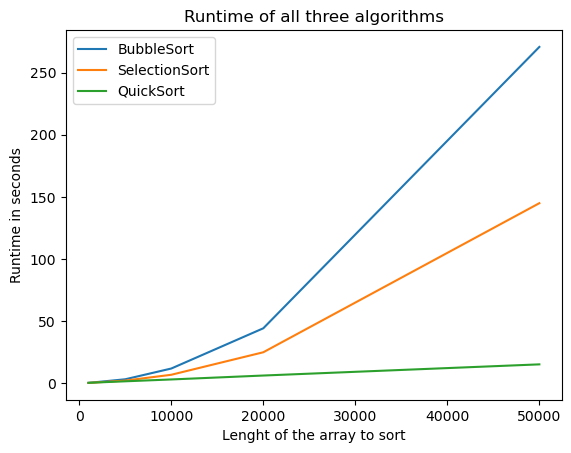

In [15]:
plt.plot(x,y_BubbleSort,label='BubbleSort')
plt.plot(x,y_SelectionSort,label='SelectionSort')
plt.plot(x,y_QuickSort,label='QuickSort')
plt.xlabel('Lenght of the array to sort')
plt.ylabel('Runtime in seconds')
plt.title('Runtime of all three algorithms')
plt.legend()
plt.show()